<a href="https://www.kaggle.com/code/samithhegde/spaceship-titanic-competition?scriptVersionId=117942463" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [5]:
train["VIP"].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [6]:
train1 = train.fillna(train.mode().iloc[0])
train1.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
train1["VIP"].value_counts()

False    8494
True      199
Name: VIP, dtype: int64

In [8]:
train["HomePlanet"].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [9]:
train1["HomePlanet"].value_counts()

Earth     4803
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [10]:
train["CryoSleep"].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [11]:
train1["CryoSleep"].value_counts()

False    5656
True     3037
Name: CryoSleep, dtype: int64

In [12]:
train["Destination"].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [13]:
train["Transported"].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [14]:
train["Age"].mean()

28.82793046746535

In [15]:
train1["Age"].mean()

28.72851719774531

In [16]:
train[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].mean()

RoomService     224.687617
FoodCourt       458.077203
ShoppingMall    173.729169
Spa             311.138778
VRDeck          304.854791
dtype: float64

In [17]:
train1[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].mean()

RoomService     220.009318
FoodCourt       448.434027
ShoppingMall    169.572300
Spa             304.588865
VRDeck          298.261820
dtype: float64

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RoomService'}>],
       [<AxesSubplot:title={'center':'FoodCourt'}>,
        <AxesSubplot:title={'center':'ShoppingMall'}>],
       [<AxesSubplot:title={'center':'Spa'}>,
        <AxesSubplot:title={'center':'VRDeck'}>]], dtype=object)

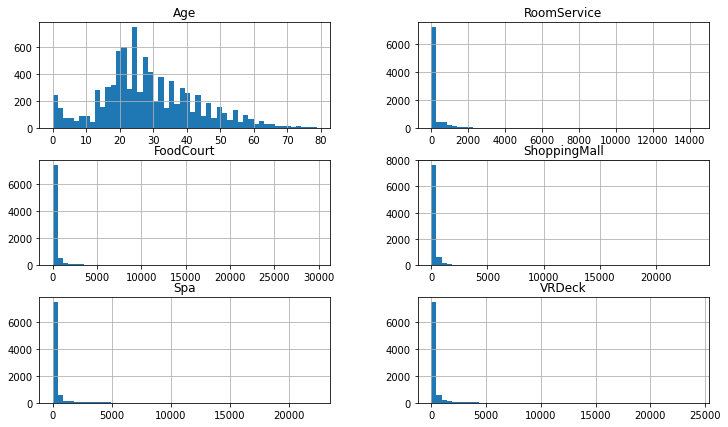

In [19]:
train1.hist(bins=50, figsize=(12,7))

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

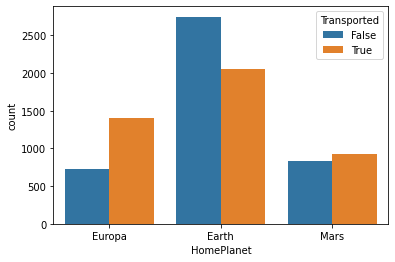

In [20]:
sns.countplot(data=train1, x='HomePlanet', hue='Transported')

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

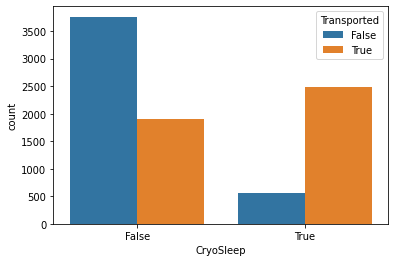

In [21]:
sns.countplot(data=train1, x='CryoSleep', hue='Transported')

<AxesSubplot:xlabel='Destination', ylabel='count'>

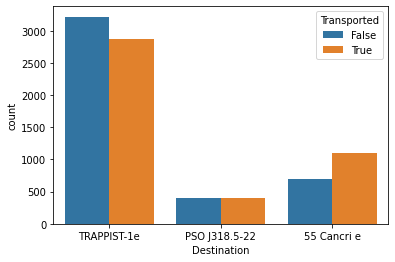

In [22]:
sns.countplot(data=train1, x='Destination', hue='Transported')

<AxesSubplot:xlabel='VIP', ylabel='count'>

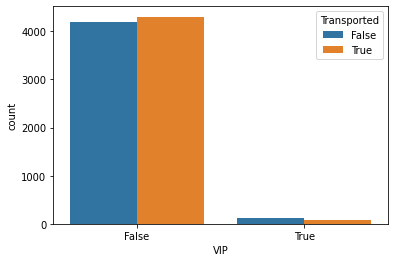

In [23]:
sns.countplot(data=train1, x='VIP', hue='Transported')

<AxesSubplot:>

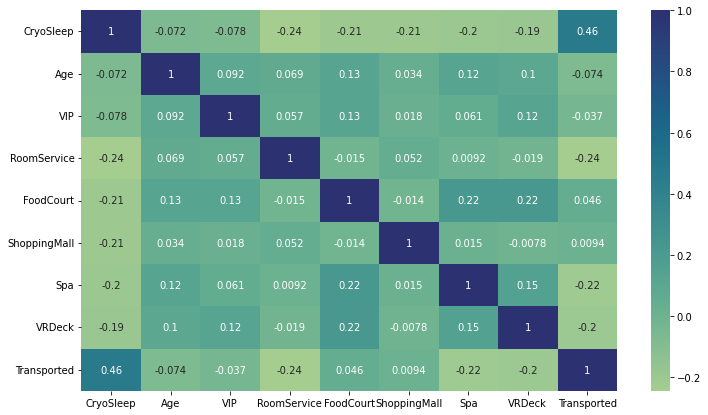

In [24]:
plt.figure(figsize=(12,7))
sns.heatmap(train1.corr(), annot=True, cmap='crest')

In [25]:
y = train1["Transported"]
x = train1.drop("Transported", axis=1)
x.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines


In [26]:
test = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [27]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [28]:
test1 = test.fillna(test.mode().iloc[0])

In [29]:
num_feats = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
cat_feats = ["HomePlanet", "CryoSleep", "Destination", "VIP"]

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

num_pipe = Pipeline([
    ('scaler', StandardScaler())
])

In [31]:
num_list = list(num_feats)
cat_list = list(cat_feats)

In [32]:
final_pipe = ColumnTransformer([
    ('num', num_pipe, num_list),
    ('cat', OneHotEncoder(), cat_list)
])

In [33]:
x_train = final_pipe.fit_transform(x)

In [34]:
x_train

array([[ 0.71555276, -0.33310466, -0.28102673, ...,  1.        ,
         1.        ,  0.        ],
       [-0.32940751, -0.16807343, -0.27538657, ...,  1.        ,
         1.        ,  0.        ],
       [ 2.03916911, -0.2680006 ,  1.95999765, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-0.19007947, -0.33310466, -0.28102673, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.22790464, -0.33310466,  0.37636549, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.06387285, -0.14233462,  2.656871  , ...,  1.        ,
         1.        ,  0.        ]])

In [35]:
#from sklearn.svm import SVC
#svc = SVC(kernel='poly')
#svc.fit(x_train, y)

In [36]:
#from sklearn.metrics import accuracy_score
#svc_pred = svc.predict(x_train)
#accuracy_score(y, svc_pred)

In [37]:
#from sklearn.model_selection import GridSearchCV

#params_grid = {
 #   'C':[10,100],
 #   'gamma':[0.1,0.01,0.001],
 #   'degree':[2,3,4]
#}

#grid_search = GridSearchCV(SVC(kernel='poly'), params_grid, verbose=2)
#grid_search.fit(x_train, y)

In [38]:
#grid_search.best_params_

In [39]:
#poly_best = grid_search.best_estimator_
#grid_pred = poly_best.predict(x_train)

In [40]:
#accuracy_score(y, grid_pred)

In [41]:
x_test = final_pipe.transform(test1)
x_test

array([[-0.12041545, -0.33310466, -0.28102673, ...,  1.        ,
         1.        ,  0.        ],
       [-0.6777276 , -0.33310466, -0.27538657, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.15824062, -0.33310466, -0.28102673, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.74739162, -0.33310466, -0.28102673, ...,  0.        ,
         1.        ,  0.        ],
       [-0.74739162, -0.33310466,  1.39848819, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.99420884, -0.33310466, -0.28102673, ...,  0.        ,
         1.        ,  0.        ]])

In [42]:
x.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

In [43]:
test1.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

In [44]:
len(x_train)

8693

In [45]:
len(x_test)

4277

In [46]:
#final_prediction = poly_best.predict(x_test)

In [47]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag = BaggingClassifier(
    DecisionTreeClassifier(class_weight='balanced'),
    max_samples=0.5, bootstrap=False, n_estimators=300, max_features=0.5
)

bag.fit(x_train, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced'),
                  bootstrap=False, max_features=0.5, max_samples=0.5,
                  n_estimators=300)

In [48]:
from sklearn.metrics import accuracy_score

pred_bag = bag.predict(x_train)
accuracy_score(y, pred_bag)

0.9124582997814333

In [49]:
pred_bag_final = bag.predict(x_test)

In [50]:
output = pd.DataFrame({'PassengerId': test1.PassengerId, 'Transported':pred_bag_final})
output.to_csv('submission.csv', index=False)